In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [3]:
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [4]:
import utils.basic_geodesic_plotter as bgp
import utils.symbolic_variables as vrs

from geodesics_from_metric import geodesic_from_metric
from line_element_to_metric_tensor import line_element_to_metric_tensor

In [5]:
q, dq = vrs.create_variables_and_differentials(
    't ell theta phi',
    parameter_var_string=None
)

In [6]:
params_sym = vrs.create_param_variables('b_0')
params_sym

Matrix([[b_0]])

In [7]:
q

Matrix([
[    t],
[  ell],
[theta],
[  phi]])

In [8]:
dq

Matrix([
[    dt],
[  dell],
[dtheta],
[  dphi]])

In [10]:
line_element = (
    -dq[0] ** 2
    + dq[1] ** 2
    + (params_sym[0] ** 2 + q[1] ** 2) * (dq[2] ** 2 + sym.sin(q[2]) ** 2 * dq[3] ** 2)
)
line_element

dell**2 - dt**2 + (b_0**2 + ell**2)*(dphi**2*sin(theta)**2 + dtheta**2)

In [11]:
line_element_to_metric_tensor(line_element, dq)

Matrix([
[-1, 0,               0,                                           0],
[ 0, 1,               0,                                           0],
[ 0, 0, b_0**2 + ell**2,                                           0],
[ 0, 0,               0, b_0**2*sin(theta)**2 + ell**2*sin(theta)**2]])

In [118]:
# intial conditions
metric_tensor_params = [2] # size of wormhole throat
# q0 = [0, 8, np.pi / 2, 5 * (np.pi / 180)] # need to try 0, 5, 10, 15, 20 degrees
q0 = np.random.normal(loc=0, scale=10, size=4)
q0[0] = 0
# initial 3-momentum
p0 = np.random.normal(loc=0, scale=2, size=3)
print(
    f'{q0} -- initial 4 position\n'
    f'{p0} -- initial 3 momentum'
)

[ 0.         -1.00073482 17.24111482 10.00188617] -- initial 4 position
[-2.17267795 -0.04976703 -0.51708778] -- initial 3 momentum


In [119]:
### interesting initial conditions
"""
[ 0.          3.49706759 -5.02821924 -1.43660255] -- initial 4 position
[-1.37011163 -1.72634817 -1.95015347] -- initial 3 momentum


"""

'\n[ 0.          3.49706759 -5.02821924 -1.43660255] -- initial 4 position\n[-1.37011163 -1.72634817 -1.95015347] -- initial 3 momentum\n\n\n'

In [120]:
# geodesic
n_timesteps = 5500
delta = 0.5
geod = geodesic_from_metric(
    q, 
    dq,
    line_element,
    params_sym,
    q0, 
    p0, 
    metric_tensor_params,
    n_timesteps,
    delta,
    omega=1,
    order=2, 
    timelike=True,
    solve_p0_zeroth_term=True,
    neg_g_inv=True
)
print(
    f'{geod[0][0]} -- initial 4 position\n'
    f'{geod[0][1]} -- initial 4 momentum'
)

On iteration number 0 with delta 0.5
On iteration number 1000 with delta 0.5
On iteration number 2000 with delta 0.5
On iteration number 3000 with delta 0.5
On iteration number 4000 with delta 0.5
On iteration number 5000 with delta 0.5
1.7794364000001224 -- sec to complete geodesic calculations.
[ 0.         -1.00073482 17.24111482 10.00188617] -- initial 4 position
[-1.94282288 -2.17267795 -0.04976703 -0.51708778] -- initial 4 momentum


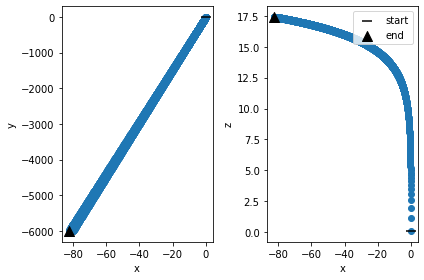

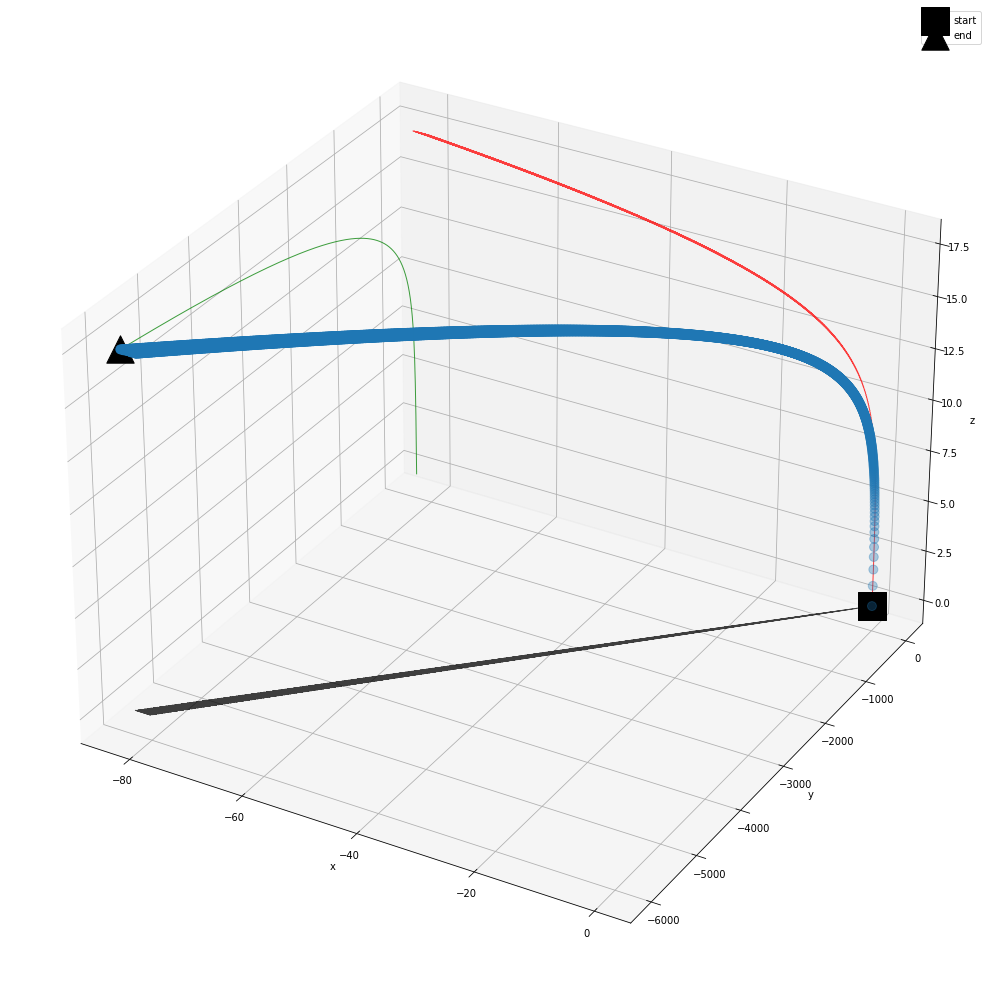

In [121]:
# two phase space should convege so will just pick first phase space
eqns_motion = np.array([i[0, :] for i in geod[1:]])

# convert to cartesian
ell = eqns_motion[:, 1]
theta = eqns_motion[:, 2]
phi = eqns_motion[:, 3]
b0 = metric_tensor_params[0]

r = np.sqrt(b0 ** 2 + ell ** 2)
z = b0 * np.log((r / b0) + np.sqrt((r / b0) ** 2 - 1))
                
x = r * np.cos(theta)
y = r * np.sin(theta)


bgp.geodesic_plotter_3d(x, y, z, axes_names=['x', 'y', 'z'])

In [99]:
"""
Thomas Müller, Frank Grave,
GeodesicViewer – A tool for exploring geodesics in the theory of relativity,
Computer Physics Communications,
Volume 181, Issue 2,
2010,
Pages 413-419,
ISSN 0010-4655,
https://doi.org/10.1016/j.cpc.2009.10.010.
(https://www.sciencedirect.com/science/article/pii/S0010465509003233)
Abstract: The GeodesicViewer realizes exocentric two- and three-dimensional illustrations of lightlike and timelike geodesics in the general theory of relativity. By means of an intuitive graphical user interface, all parameters of a spacetime as well as the initial conditions of the geodesics can be modified interactively. This makes the GeodesicViewer a useful instrument for the exploration of geodesics in four-dimensional Lorentzian spacetimes.
Program summary
Program title: GeodesicViewer Catalogue identifier: AEFP_v1_0 Program summary URL: http://cpc.cs.qub.ac.uk/summaries/AEFP_v1_0.html Program obtainable from: CPC Program Library, Queen's University, Belfast, N. Ireland Licensing provisions: Standard CPC licence, http://cpc.cs.qub.ac.uk/licence/licence.html No. of lines in distributed program, including test data, etc.: 168 868 No. of bytes in distributed program, including test data, etc.: 6 076 202 Distribution format: tar.gz Programming language: C++, Qt, Qwt, OpenGL Computer: All platforms with a C++ compiler, Qt, Qwt, OpenGL Operating system: Linux, Mac OS X RAM: 24 Mbytes Classification: 1.5 External routines:•Gnu Scientific Library (GSL) (http://www.gnu.org/software/gsl/)•Motion4D (included in the package). The Motion4D library can also be downloaded from CPC. Catalogue identifier: AEEX•Qt (http://qt.nokia.com/downloads)•Qwt (http://qwt.sourceforge.net/)•OpenGL (http://www.opengl.org/) Nature of problem: Illustrate geodesics in four-dimensional Lorentzian spacetimes. Solution method: Integration of ordinary differential equations. 3D-Rendering via OpenGL. Running time: Interactive. The examples given take milliseconds.
Keywords: General relativity; Timelike and lightlike geodesics
"""

"\nThomas Müller, Frank Grave,\nGeodesicViewer – A tool for exploring geodesics in the theory of relativity,\nComputer Physics Communications,\nVolume 181, Issue 2,\n2010,\nPages 413-419,\nISSN 0010-4655,\nhttps://doi.org/10.1016/j.cpc.2009.10.010.\n(https://www.sciencedirect.com/science/article/pii/S0010465509003233)\nAbstract: The GeodesicViewer realizes exocentric two- and three-dimensional illustrations of lightlike and timelike geodesics in the general theory of relativity. By means of an intuitive graphical user interface, all parameters of a spacetime as well as the initial conditions of the geodesics can be modified interactively. This makes the GeodesicViewer a useful instrument for the exploration of geodesics in four-dimensional Lorentzian spacetimes.\nProgram summary\nProgram title: GeodesicViewer Catalogue identifier: AEFP_v1_0 Program summary URL: http://cpc.cs.qub.ac.uk/summaries/AEFP_v1_0.html Program obtainable from: CPC Program Library, Queen's University, Belfast, N.